# Optimizing (m, b) in y = mx + b

First, we use numpy to generate random, linear-ish data

Actual line: y = 0.2953824613239564x + 0.9938271597451462


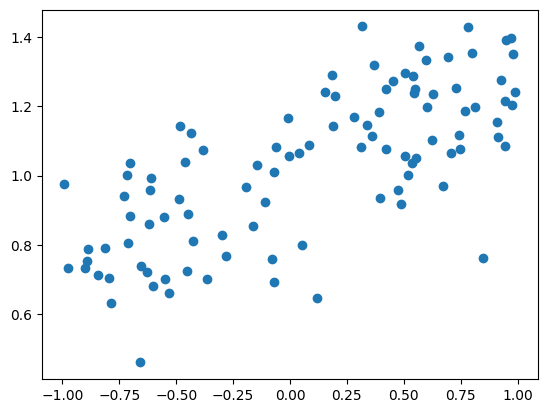

In [276]:
import numpy as np
import matplotlib.pyplot as plt

random_seed = 1024
np.random.seed(random_seed)

# these values are in [-1, 1]
actual_m, actual_b = np.random.random() * 2 - 1, np.random.random() * 2 - 1
print(f"Actual line: y = {actual_m}x + {actual_b}")

# generate 1000 points
n_points = 100
x = np.random.random(n_points) * 2 - 1
noise = np.random.randn(n_points) * 0.15
y = actual_m * x + actual_b + noise

# plot the data
plt.scatter(x, y)
plt.show()

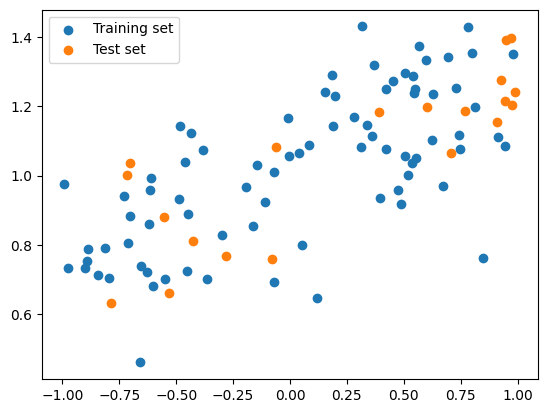

In [277]:
# split the data into training and test sets
n_test = n_points // 5
n_train = n_points - n_test

train_x = x[:n_train]
train_y = y[:n_train]
test_x = x[n_train:]
test_y = y[n_train:]

# plot the training and test sets
plt.scatter(train_x, train_y, label='Training set')
plt.scatter(test_x, test_y, label='Test set')
plt.legend()
plt.show()    

In [278]:
# define the loss function
def loss(m, b, x, y):
    y_pred = m * x + b
    squared_error = (y_pred - y) ** 2
    return squared_error.sum() / len(x)

def derivative_loss(m, b, x, y):
    y_pred = m * x + b
    derivative_wrt_m = 2 * (y_pred - y) * x
    derivative_wrt_b = 2 * (y_pred - y)

    derivative_wrt_m = derivative_wrt_m.sum() / len(x)
    derivative_wrt_b = derivative_wrt_b.sum() / len(x)
    return derivative_wrt_m, derivative_wrt_b

# randomly initialize m and b
def train(x, y, learning_rate=0.01, n_iters=10, plot_each_step=False, initial_m=None, initial_b=None):
    if initial_m is None:
        initial_m = np.random.random() * 2 - 1
    if initial_b is None:
        initial_b = np.random.random() * 2 - 1
    m, b = initial_m, initial_b
    for _ in range(n_iters):
        derivative_m, derivative_b = derivative_loss(m, b, x, y)
        if plot_each_step:
            plt.scatter(x, y)
            plt.plot(x, m * x + b, color='red')
            plt.show()
        m -= learning_rate * derivative_m
        b -= learning_rate * derivative_b
    return m, b

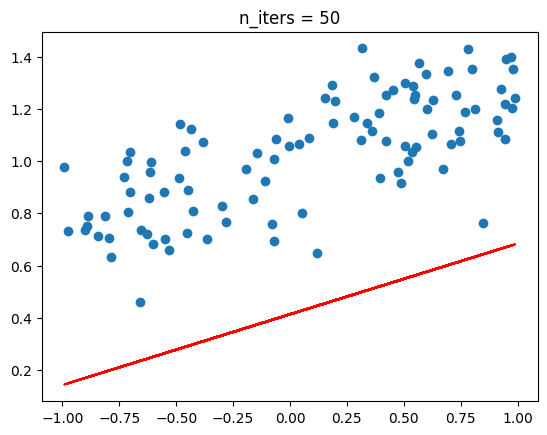

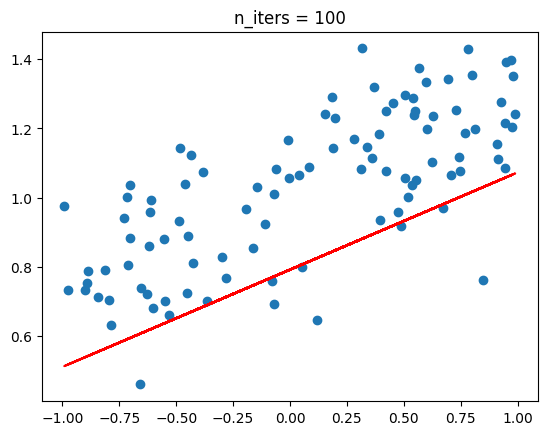

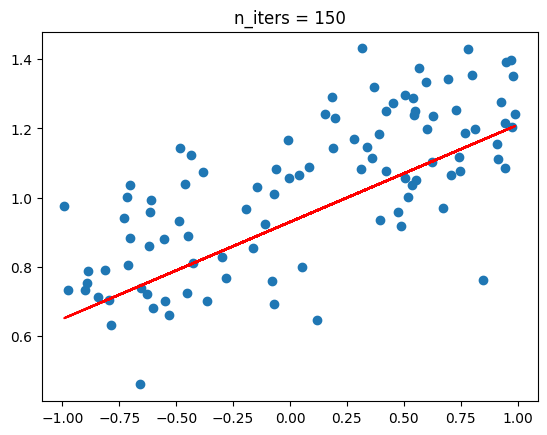

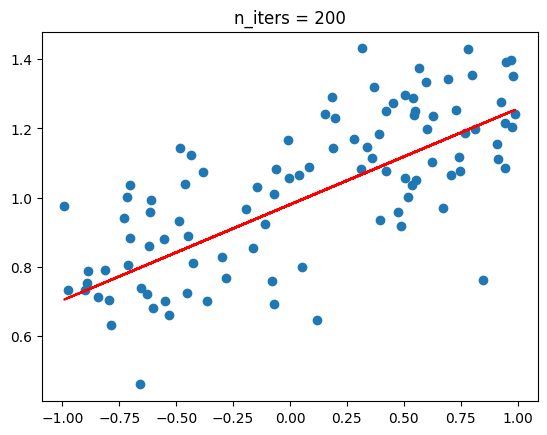

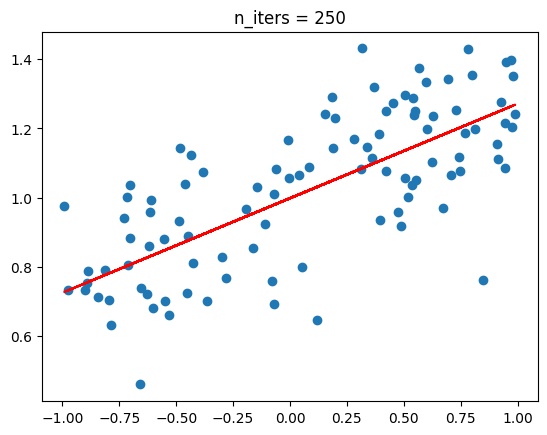

In [279]:
steps_between_plots = 50
total_steps = 250
m, b = None, None
for steps in range(0, total_steps, steps_between_plots):
    m, b = train(train_x, train_y, n_iters=steps_between_plots, initial_m=m, initial_b=b)
    plt.scatter(x, y)
    plt.plot(x, m * x + b, color='red')
    plt.title(f'n_iters = {steps + steps_between_plots}')
    plt.show()
final_m, final_b = m, b


Train MSE: 0.025543361684998534
Test MSE: 0.01574046834461019


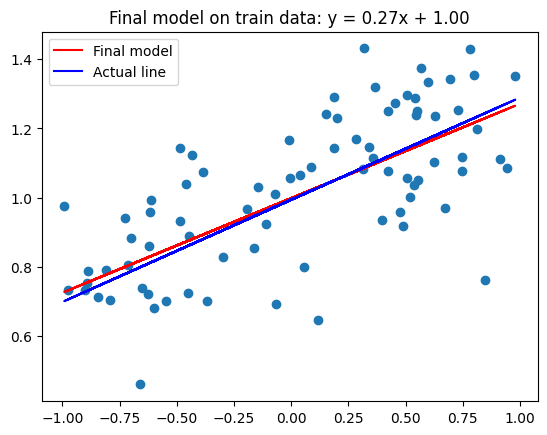

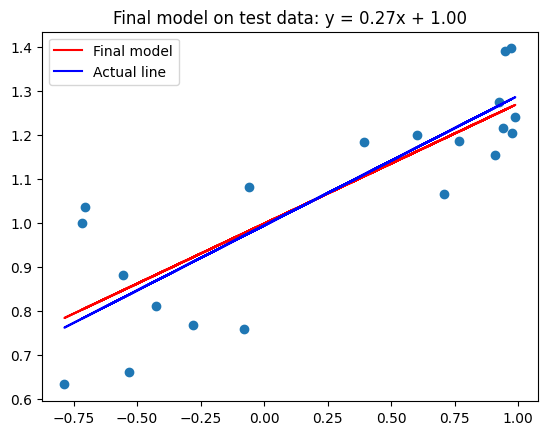

In [280]:
# mean squared error on train data
train_mse = loss(final_m, final_b, train_x, train_y)
print(f'Train MSE: {train_mse}')

# mean squared error on test data
test_mse = loss(final_m, final_b, test_x, test_y)
print(f'Test MSE: {test_mse}')

plt.scatter(train_x, train_y)
plt.plot(train_x, final_m * train_x + final_b, color='red', label='Final model')
plt.plot(train_x, actual_m * train_x + actual_b, color='blue', label='Actual line')
plt.title(f'Final model on train data: y = {final_m:.2f}x + {final_b:.2f}')
plt.legend()
plt.show()
plt.scatter(test_x, test_y)
plt.plot(test_x, final_m * test_x + final_b, color='red', label='Final model')
plt.plot(test_x, actual_m * test_x + actual_b, color='blue', label='Actual line')
plt.title(f'Final model on test data: y = {final_m:.2f}x + {final_b:.2f}')
plt.legend()
plt.show()
